In [73]:
import pandas as pd
import numpy as np
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = acquire.get_telco_data()

Using cached csv


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [44]:
train, validate, test = prepare.prep_telco_data(df)

In [69]:
dft = train
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3937 non-null   object 
 1   is_senior_citizen         3937 non-null   int64  
 2   tenure                    3937 non-null   int64  
 3   multiple_lines            3937 non-null   object 
 4   monthly_charges           3937 non-null   float64
 5   total_charges             3937 non-null   float64
 6   internet_service_type     3937 non-null   object 
 7   contract_type             3937 non-null   object 
 8   payment_type              3937 non-null   object 
 9   is_autopay                3937 non-null   int64  
 10  is_male                   3937 non-null   uint8  
 11  has_partner               3937 non-null   uint8  
 12  has_dependents            3937 non-null   uint8  
 13  online_security           3937 non-null   uint8  
 14  onlin

In [71]:
dft.nunique()

customer_id                 3937
is_senior_citizen              2
tenure                        72
multiple_lines                 3
monthly_charges             1331
total_charges               3748
internet_service_type          3
contract_type                  3
payment_type                   4
is_autopay                     2
is_male                        2
has_partner                    2
has_dependents                 2
online_security                2
online_backup                  2
phone_service                  2
device_protection              2
tech_support                   2
streaming_tv                   2
streaming_movies               2
paperless_billing              2
churn                          2
one_line                       2
no_phone_service               2
has_multiple_lines             2
month_to_month_contract        2
one_year_contract              2
two_year_contract              2
dsl_internet                   2
fiber_optic_internet           2
no_interne

In [46]:
telco_corr = dft.drop(columns = 'customer_id').corr()
telco_corr


,is_senior_citizen,tenure,monthly_charges,total_charges,is_autopay,is_male,has_partner,has_dependents,online_security,online_backup,...,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_autopay,credit_card_autopay,electronic_check_nonauto,mailed_check_nonauto
is_senior_citizen,1.000000,0.012348,0.224259,0.106855,-0.026933,-0.013411,0.017874,-0.206309,-0.039172,0.071800,...,0.131603,-0.029746,-0.124541,-0.095211,0.250947,-0.191381,-0.011744,-0.020358,0.170854,-0.159609
tenure,0.012348,1.000000,0.258456,0.826402,0.405226,-0.008735,0.384882,0.170727,0.341214,0.354726,...,-0.655511,0.202264,0.569234,0.014668,0.028768,-0.051233,0.233188,0.250554,-0.217421,-0.237574
monthly_charges,0.224259,0.258456,1.000000,0.658896,0.067091,-0.002743,0.116981,-0.113951,0.297334,0.447821,...,0.044450,0.007936,-0.059051,-0.152446,0.786980,-0.767519,0.036185,0.043873,0.258575,-0.369683
total_charges,0.106855,0.826402,0.658896,1.000000,0.312122,-0.005145,0.325783,0.068300,0.422470,0.505129,...,-0.450773,0.166754,0.365313,-0.049713,0.370010,-0.386008,0.172607,0.199898,-0.068034,-0.294499
is_autopay,-0.026933,0.405226,0.067091,0.312122,1.000000,-0.014151,0.151932,0.073438,0.173951,0.149307,...,-0.324746,0.116379,0.266724,0.068287,-0.057158,-0.009770,0.589757,0.604191,-0.626362,-0.485547
is_male,-0.013411,-0.008735,-0.002743,-0.005145,-0.014151,1.000000,-0.024028,-0.009145,-0.004684,0.002009,...,0.001405,0.008711,-0.009857,0.027227,-0.012576,-0.016123,-0.021672,0.004600,0.016286,-0.001454
has_partner,0.017874,0.384882,0.116981,0.325783,0.151932,-0.024028,1.000000,0.450989,0.163225,0.144928,...,-0.266963,0.079791,0.234266,0.002174,0.012896,-0.017927,0.099312,0.082215,-0.080519,-0.090194
has_dependents,-0.206309,0.170727,-0.113951,0.068300,0.073438,-0.009145,0.450989,1.000000,0.090174,0.022387,...,-0.217235,0.067191,0.188490,0.060429,-0.169803,0.134073,0.042797,0.044877,-0.136973,0.066366
online_security,-0.039172,0.341214,0.297334,0.422470,0.173951,-0.004684,0.163225,0.090174,1.000000,0.289645,...,-0.250806,0.097178,0.199104,0.339514,-0.039246,-0.341786,0.094195,0.113382,-0.113228,-0.079671
online_backup,0.071800,0.354726,0.447821,0.505129,0.149307,0.002009,0.144928,0.022387,0.289645,1.000000,...,-0.155368,0.073369,0.110900,0.159377,0.172404,-0.388881,0.086846,0.091403,-0.006280,-0.170332


heatmap

In [47]:
dft['total'] = dft.monthly_charges * dft.tenure

In [52]:
dft.total

5919    4123.80
1915    6066.95
5054     901.25
2355      19.20
6279    1080.00
         ...   
394     2134.80
3763    1002.50
3444     555.50
1002    1960.20
4192      40.10
Name: total, Length: 3937, dtype: float64

In [54]:
def plot_variable_pairs(dft):
    sns.pairplot(dft, kind='reg') #, plot_kws={'line_kws':{'color':'red'}})

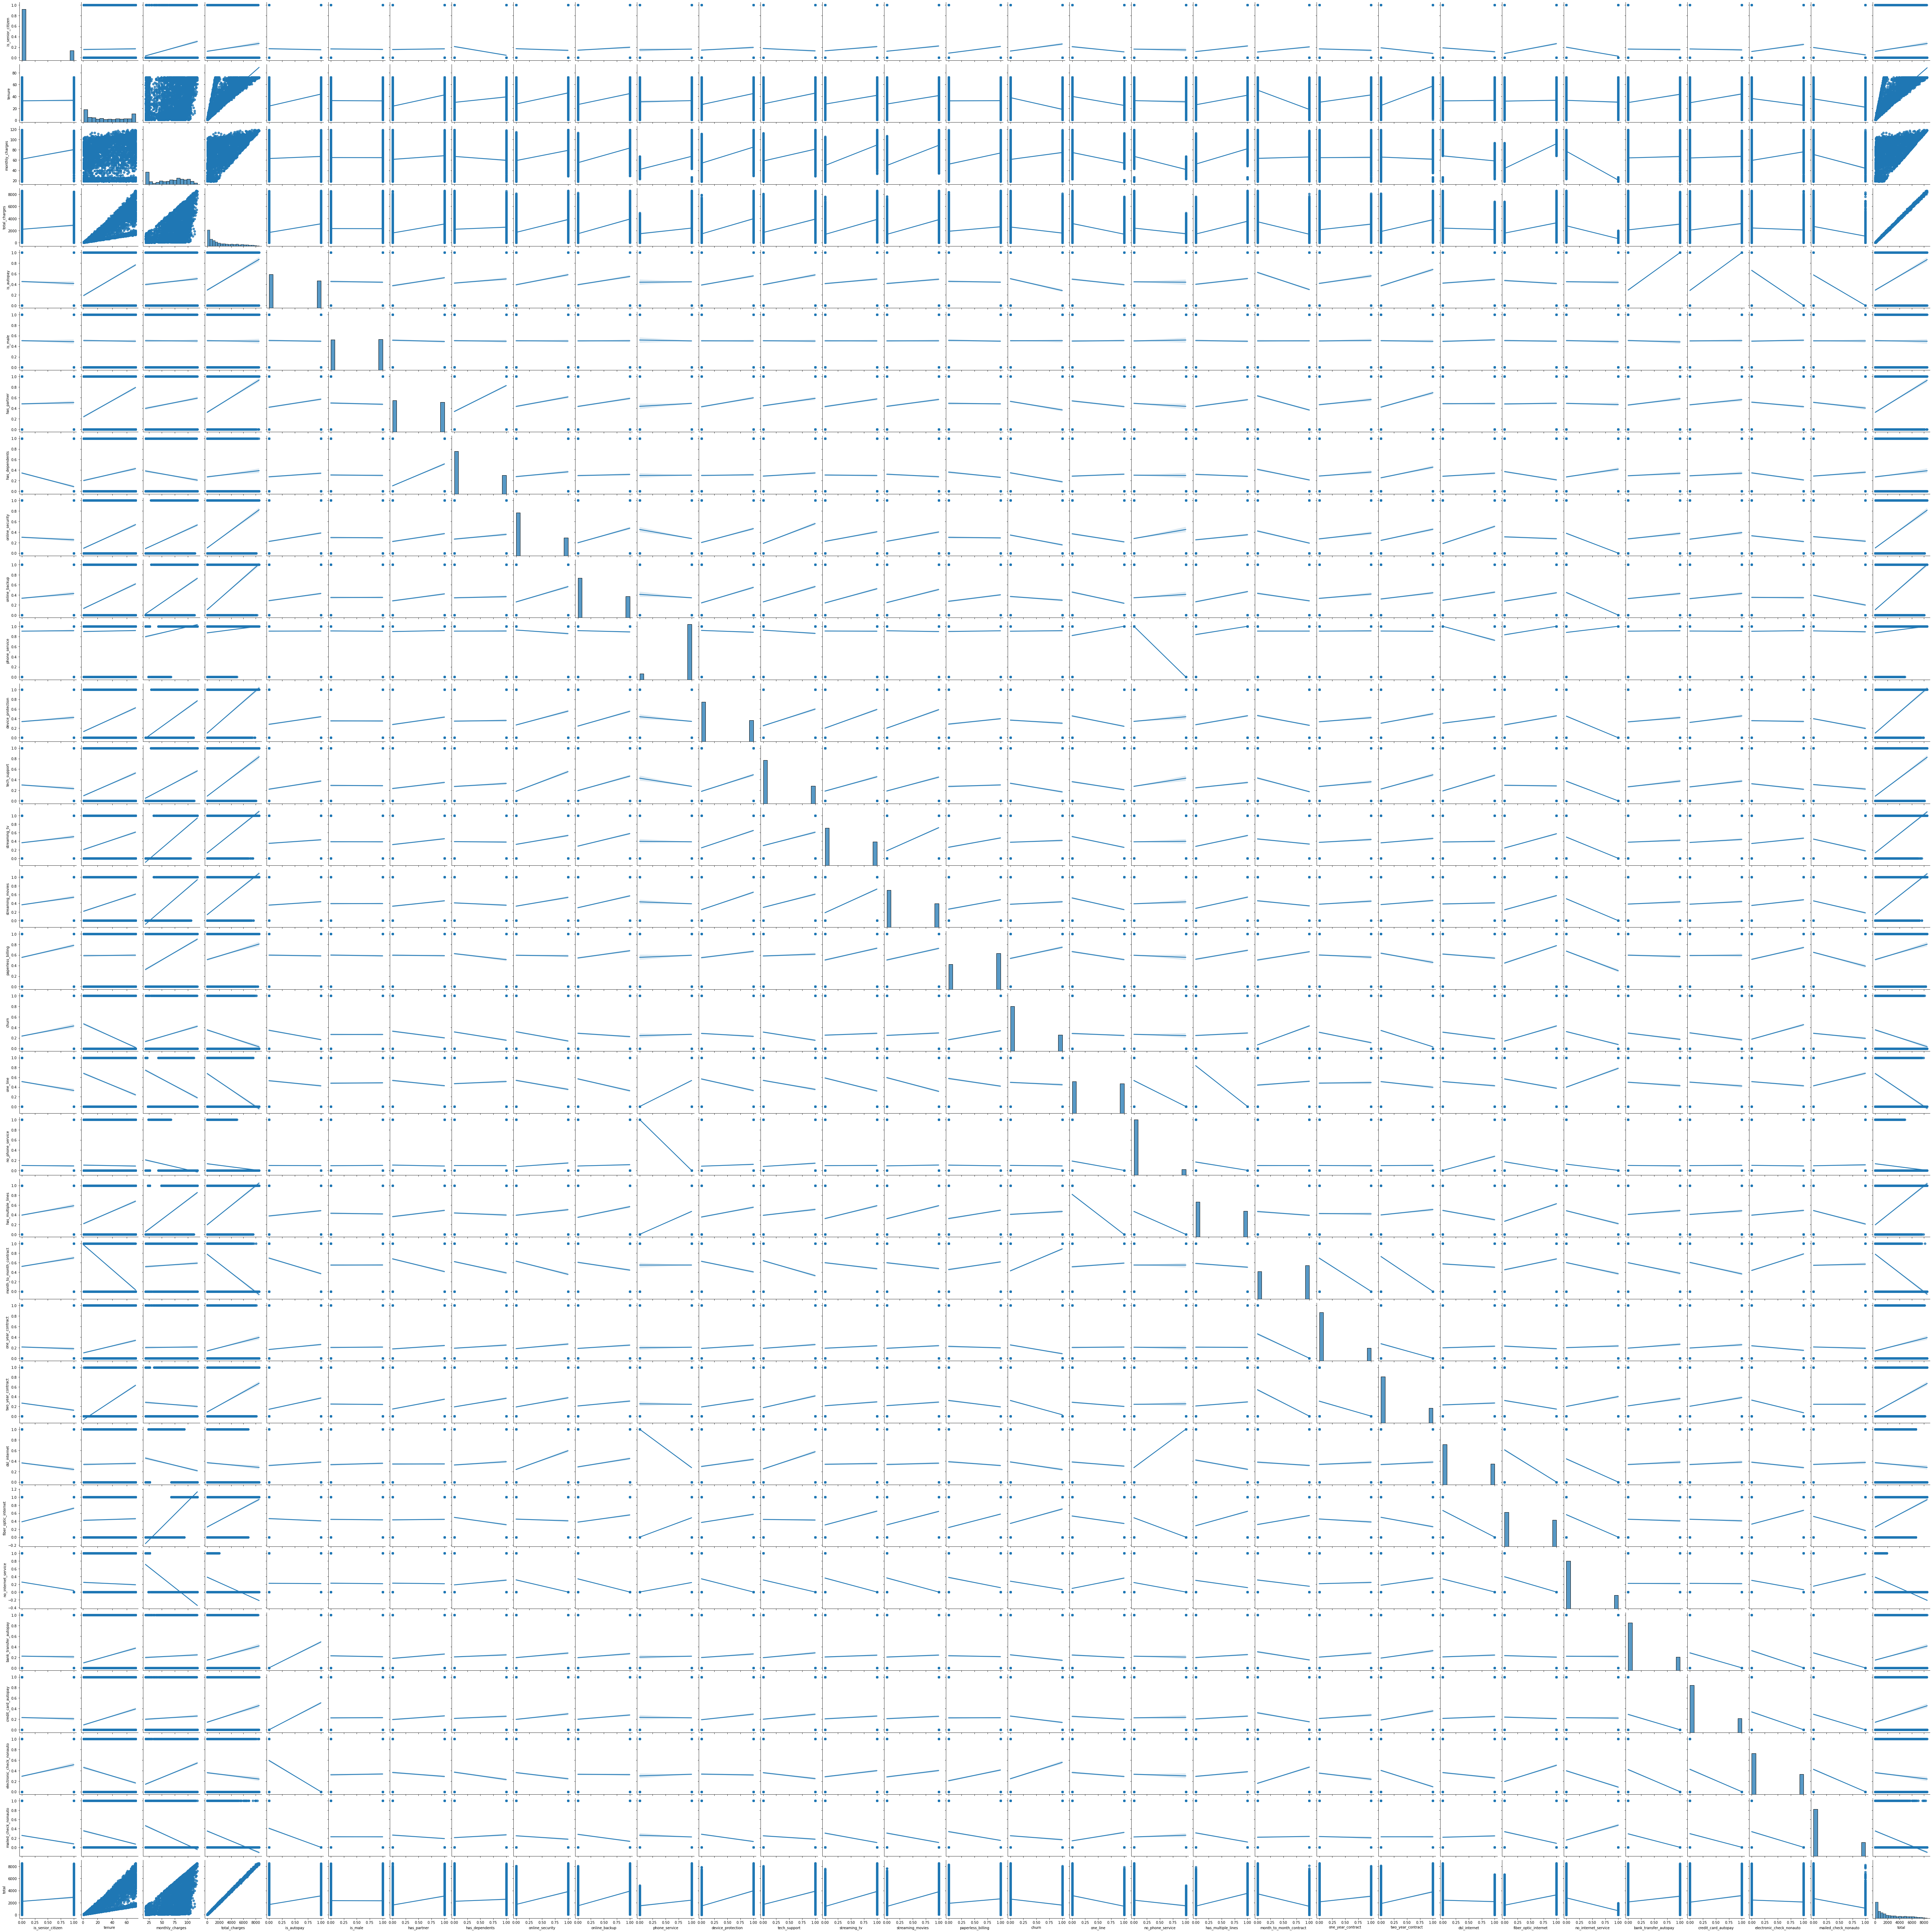

In [55]:
plot_variable_pairs(dft)

In [65]:
def months_to_years(dft):
    dft['tenure_years'] = dft.tenure // 12
    return dft.tenure_years, dft.tenure

In [66]:
months_to_years(dft)

(5919    4
 1915    5
 5054    2
 2355    0
 6279    1
        ..
 394     2
 3763    0
 3444    1
 1002    1
 4192    0
 Name: tenure_years, Length: 3937, dtype: int64,
 5919    58
 1915    71
 5054    35
 2355     1
 6279    20
         ..
 394     24
 3763    10
 3444    22
 1002    22
 4192     2
 Name: tenure, Length: 3937, dtype: int64)

In [110]:
cont_col = ['tenure', 'monthly_charges', 'total_charges', 'total']


In [116]:
dft[cont_col]

,tenure,monthly_charges,total_charges,total
5919,58,71.10,4299.20,4123.80
1915,71,85.45,6028.95,6066.95
5054,35,25.75,882.55,901.25
2355,1,19.20,19.20,19.20
6279,20,54.00,1055.90,1080.00
...,...,...,...,...
394,24,88.95,2072.75,2134.80
3763,10,100.25,1064.65,1002.50
3444,22,25.25,555.40,555.50
1002,22,89.10,1949.40,1960.20


In [161]:
def plot_categorical_and_continuous_vars(dft):
    cat_col = ['is_senior_citizen', 'multiple_lines', 'internet_service_type', 'contract_type', 'payment_type', 'is_autopay', 'tenure']
    cont_col = ['tenure', 'monthly_charges', 'total_charges']
    for col in cont_col:
        for n in cont_col:
            if n == col:
                continue
            sns.lmplot(x= col, y=n, data = dft[cont_col], line_kws={'color': 'red'})
            plt.show()
    for col in cat_col:
        for c in cat_col:
            if c == col:
                continue
            sns.boxplot(x=col, y=c, data=dft[cat_col])
                

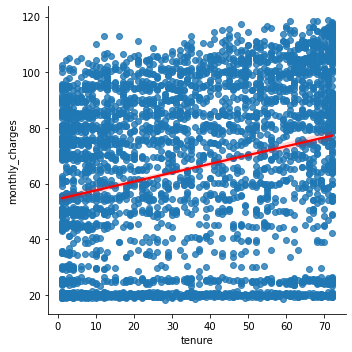

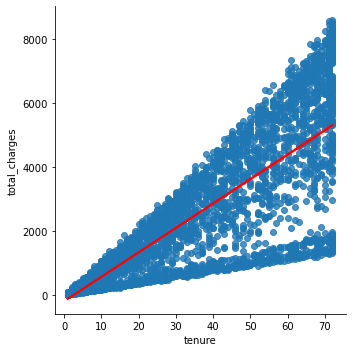

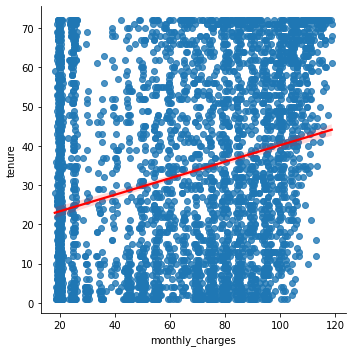

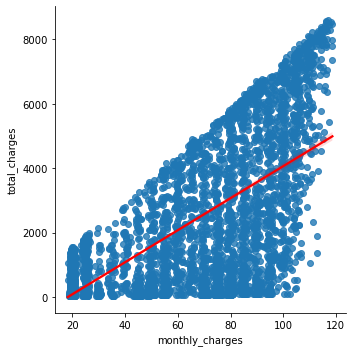

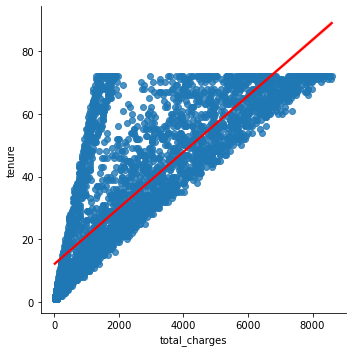

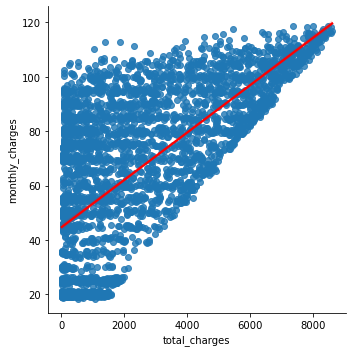

NameError: name 'y' is not defined

In [162]:
plot_categorical_and_continuous_vars(dft)